# Test BM3D

In [5]:
import scipy
import bm3d
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
KEY = 'data'

def read_image(input_path: str) -> np.ndarray:
    """Read an image from a file."""
    data = scipy.io.loadmat(input_path)
    if KEY not in data:
        raise ValueError(f"Input file must contain '{KEY}' key.")
    return data[KEY]


def c2ap(image: np.ndarray) -> np.ndarray:
    """Convert a complex image to amplitude."""
    amplitude = 20. * np.log1p(np.abs(image))
    phase = np.angle(image)
    return amplitude, phase


def ap2c(amplitude: np.ndarray, phase: np.ndarray) -> np.ndarray:
    """Convert amplitude and phase back to complex representation."""
    return (np.exp(amplitude / 20.) - 1) * np.exp(1j * phase)

1.3524803898617046 136.132225178463


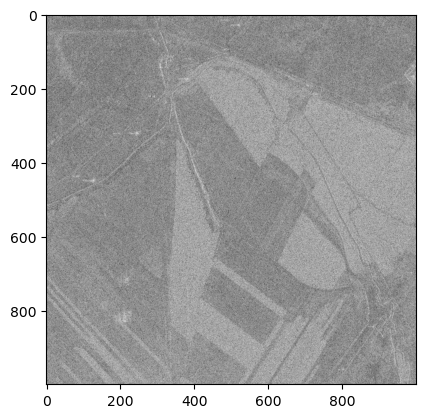

In [ ]:
input_path = '../../dataset/input_1.mat'

data = read_image(input_path)
amplitude, phase = c2ap(data)
print(amplitude.min(), amplitude.max())

plt.imshow(amplitude, cmap='gray')

In [37]:
sigma_psd = 20

output = bm3d.bm3d(amplitude, sigma_psd=sigma_psd, stage_arg=bm3d.BM3DStages.ALL_STAGES)

(np.float64(-0.5), np.float64(999.5), np.float64(999.5), np.float64(-0.5))

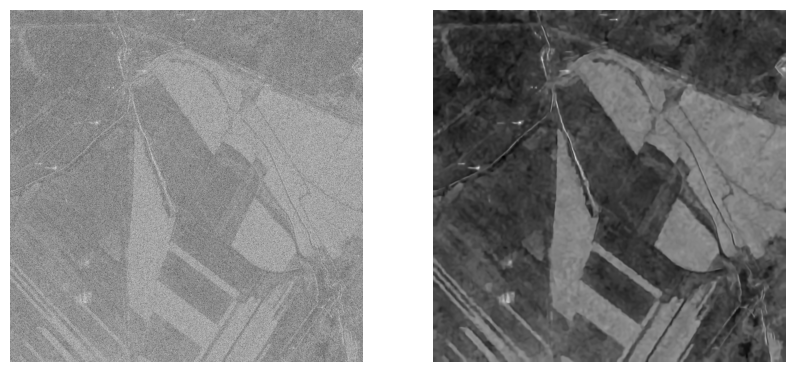

In [38]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(amplitude, cmap='gray')
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(output, cmap='gray')
plt.axis('off')